<a href="https://colab.research.google.com/github/gyeong89/ALK_Python/blob/main/python230321.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 시각화 리뷰
- matplotlib


In [1]:
import matplotlib as mpl
mpl.__version__

'3.7.1'

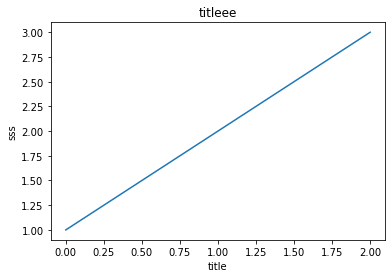

In [2]:
import matplotlib.pyplot as plt

# 데이터 가져오기

# 데이터 가공 --> 시각화로 그릴 데이터를 추출

# 시각화 코드 작성
fig, ax = plt.subplots()
# 메인 그래프
ax.plot([1, 2, 3])

# 세부 옵션
ax.set_xlabel('title')
ax.set_ylabel('sss')
ax.set_title('titleee')
plt.show()

In [3]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import yfinance as yf

aapl = yf.download('AAPL', start='2021-08-01', end='2023-03-30')
aapl.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-02,146.360001,146.949997,145.250000,145.520004,144.033417,62880000
2021-08-03,145.809998,148.039993,145.179993,147.360001,145.854630,64786600
2021-08-04,147.270004,147.789993,146.279999,146.949997,145.448807,56368300
2021-08-05,146.979996,147.839996,146.169998,147.059998,145.557663,46397700
2021-08-06,146.350006,147.110001,145.630005,146.139999,144.863815,54126800
2021-08-09,146.199997,146.699997,145.520004,146.089996,144.814224,48908700
2021-08-10,146.440002,147.710007,145.300003,145.600006,144.328506,69023100
2021-08-11,146.050003,146.720001,145.529999,145.860001,144.586243,48493500
2021-08-12,146.190002,149.050003,145.839996,148.889999,147.589783,72282600


In [5]:
tsla = yf.download('TSLA', start = '2021-08-01', end='2023-03-30')
tsla.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-02,233.333328,242.313339,232.800003,236.556671,236.556671,100847400
2021-08-03,239.666672,240.883331,233.669998,236.580002,236.580002,64860900
2021-08-04,237.000000,241.633331,236.309998,236.973328,236.973328,51007800
2021-08-05,238.666672,240.316666,237.136673,238.210007,238.210007,38758800
2021-08-06,237.300003,238.776672,232.543335,233.033340,233.033340,46869000


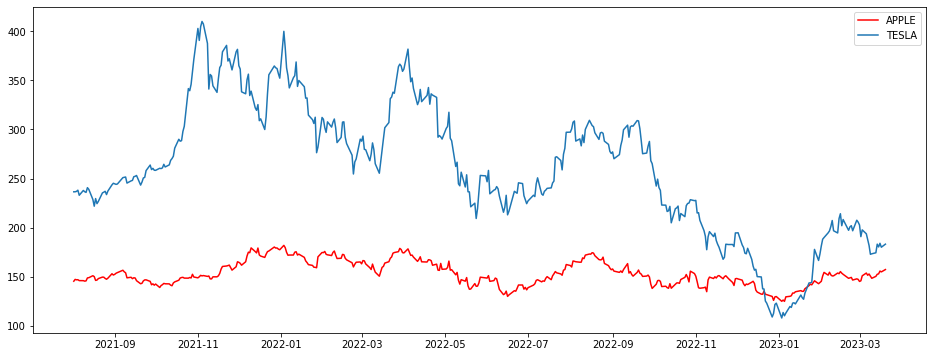

In [6]:
# 종가 시각화 그래프 작성

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(aapl['Close'],  label='APPLE', color='red' )
ax.plot(tsla['Close'],  label='TESLA' )

ax.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


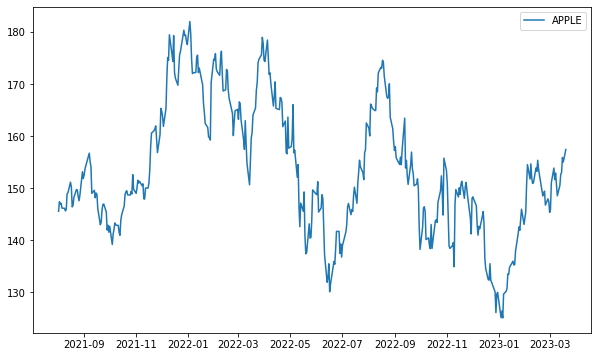

In [7]:
def stockChart(ticker=None):
  data = yf.download(ticker, start ='2021-08-01', end = '2023-03-30')
  fig, ax = plt.subplots(figsize=(10, 6))
  ax.plot(data['Close'], label = 'APPLE')
  ax.legend()
  plt.show()

stockChart('AAPL')

[*********************100%***********************]  1 of 1 completed


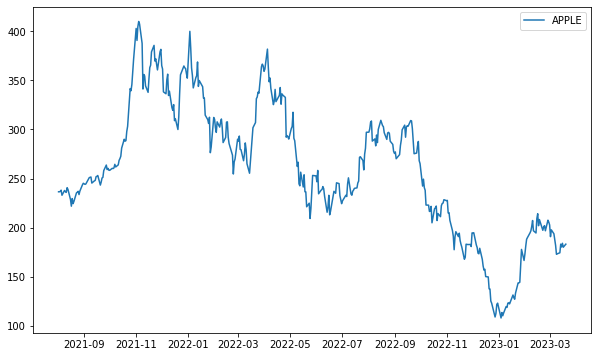

In [8]:
stockChart('TSLA')

[*********************100%***********************]  1 of 1 completed


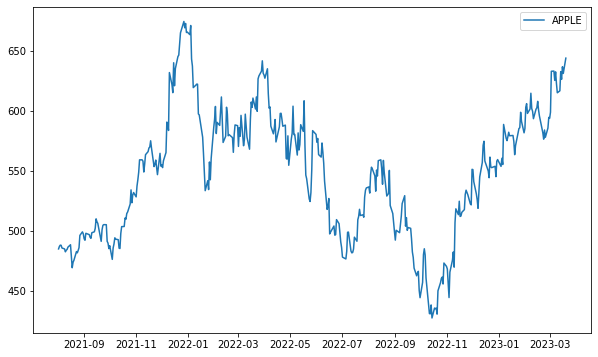

In [9]:
stockChart('AVGO')

## 산점도 그래프

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- 영수증 금액이 크면, 팁도 많이 줄까?
- 산점도 그래프, 두 개의 변수
 + 연속형 수치형 데이터만 가능함

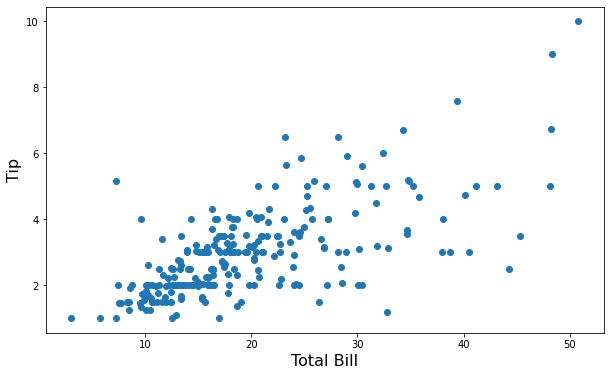

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(tips['total_bill'], tips['tip'])
ax.set_xlabel('Total Bill', size = 16)
ax.set_ylabel('Tip', size = 16)
plt.show()

- 여성과 남성 구분하여 시각화

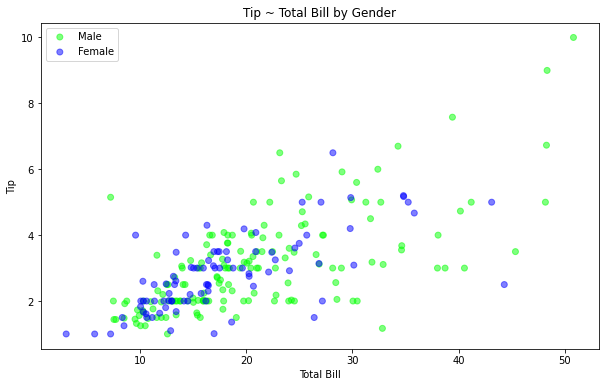

In [12]:
label, data = tips.groupby('sex')

tips['sex_color'] = tips['sex'].map({"Female" : "#0000FF", "Male" : "#00FF00"})

fig, ax = plt.subplots(figsize=(10, 6))
for label, data in tips.groupby('sex'):
  ax.scatter(data['total_bill'], data['tip'], label=label, 
             color=data['sex_color'], alpha=0.5)
  ax.set_xlabel('Total Bill')
  ax.set_ylabel('Tip')
  ax.set_title('Tip ~ Total Bill by Gender')

ax.legend() 
fig.show()

## 박스 플롯
- 그룹간의 평균을 비교, 시각적으로 표현
- 개별분포 확인
- 이상치 확인 (이상한값, 튀는값)

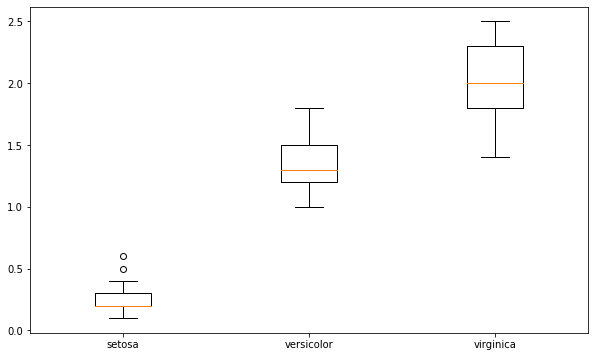

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

data = [iris[iris['species']=="setosa"]['petal_width'], 
        iris[iris['species']=="versicolor"]['petal_width'],
        iris[iris['species']=="virginica"]['petal_width']]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data, labels = ['setosa', 'versicolor','virginica' ])
plt.show()

- 아래코드 설치 후 런타임 재시작

In [14]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

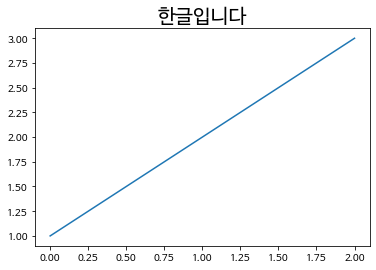

In [15]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'NanumBarunGothic')
plt.plot([1, 2, 3])
plt.title('한글입니다', size = 20)
plt.show()

## Seaborn 라이브러리
- seaborn 은 matplotlib 기반으로 만들어지 라이브러리

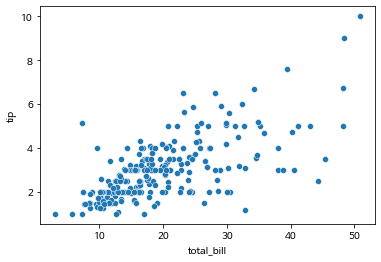

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns 

tips = sns.load_dataset('tips')
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)

plt.show()

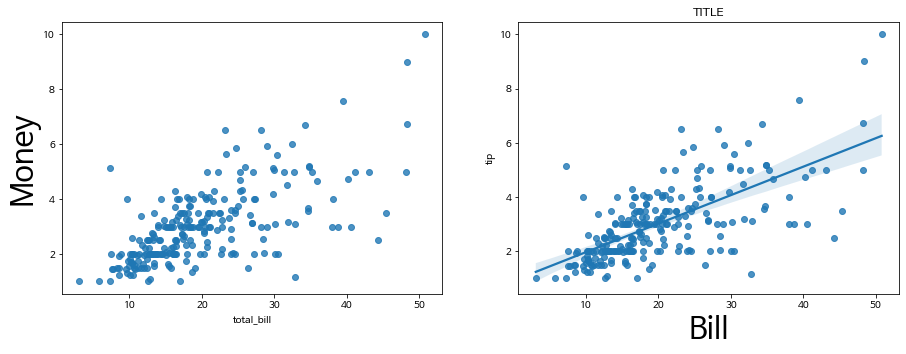

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.regplot(x = 'total_bill', 
            y = 'tip', 
            data = tips,
            ax = ax[1],
            fit_reg = True)
ax[1].set_xlabel('Bill', size = 30)
ax[1].set_title('TITLE')

sns.regplot(x = 'total_bill', 
            y = 'tip', 
            data = tips,
            ax = ax[0],
            fit_reg = False)
ax[0].set_ylabel('Money', size = 30)

plt.show()

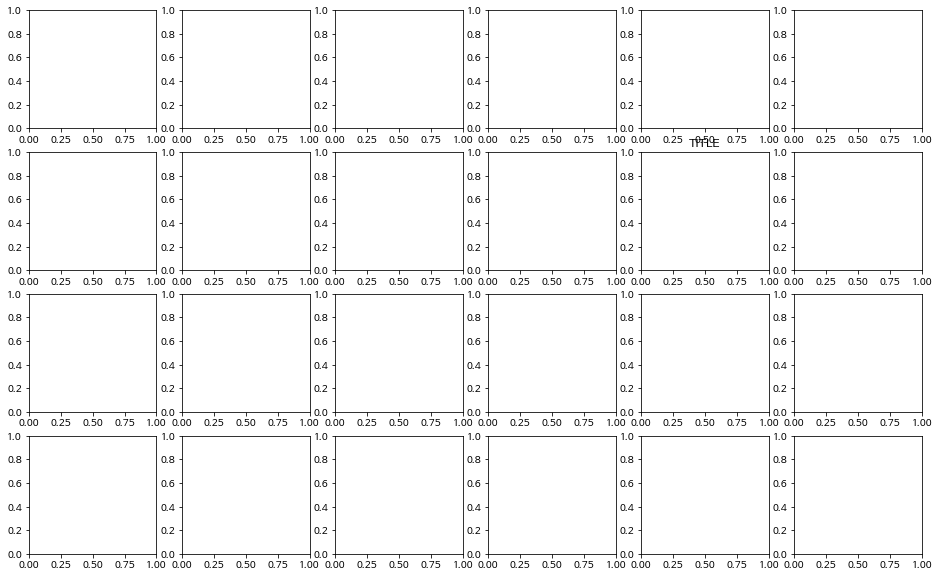

In [18]:
fig, ax = plt.subplots(nrows = 4, ncols = 6, figsize = (16, 10))
# 4 x 6 배열로 시각화 기본 화면을 만들어보세요
ax[1, 4].set_title('TITLE')
plt.show()

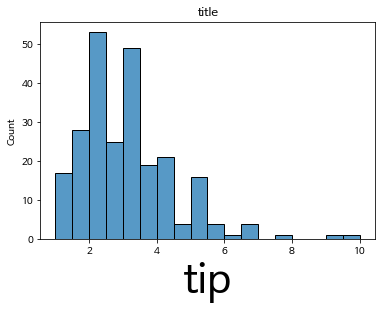

In [19]:
# 히스토그램 / 커널 밀도 그래스
tips = sns.load_dataset('tips')
fig, ax = plt.subplots()
sns.histplot(x = 'tip', data = tips, ax = ax)
ax.set_title('title')
ax.set_xlabel("tip", size = 40)
plt.show()

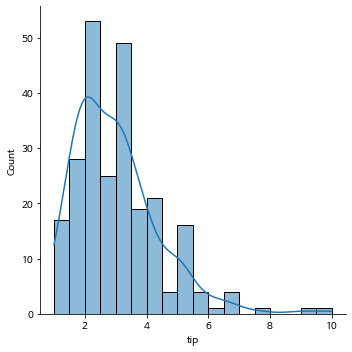

In [20]:
sns.displot(x = 'tip', kde=True, data = tips)

## 박스플롯
- matplotlib 로는 가공하기 힘들었음

<Axes: xlabel='day', ylabel='total_bill'>

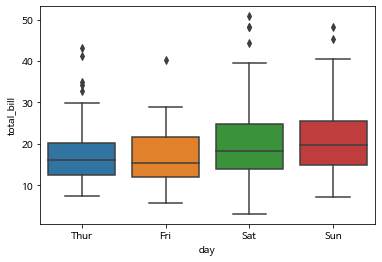

In [21]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips)

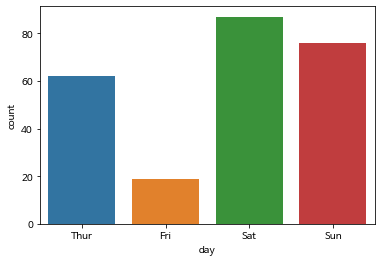

In [22]:
sns.countplot(x = 'day', data = tips)
plt.show()

In [23]:
print(tips['day'].value_counts())

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64


In [24]:
print(tips['day'].value_counts().index)

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')


In [25]:
print(tips['day'].value_counts().values)

[87 76 62 19]


In [26]:
print(tips['day'].value_counts(ascending=True))

Fri     19
Thur    62
Sun     76
Sat     87
Name: day, dtype: int64


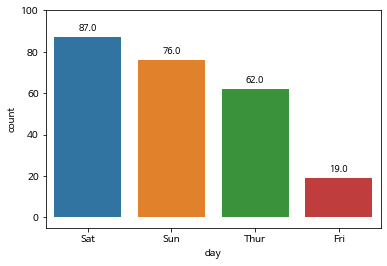

In [33]:
fig, ax = plt.subplots()
ax = sns.countplot(x = 'day', data = tips, order = tips['day'].value_counts().index)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2., height+3, height, ha = 'center', size=9)
  
ax.set_ylim(-5, 100)
plt.show()

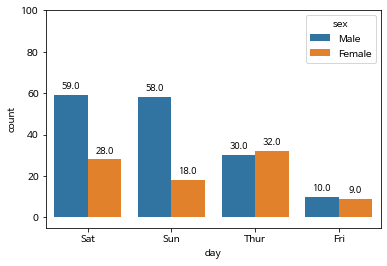

In [34]:
# 성별을 나눠ㅓ서 보도록 하자
fig, ax = plt.subplots()
ax = sns.countplot(x = 'day', data = tips, hue = 'sex',
                   order = tips['day'].value_counts().index)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2., height+3, height, ha = 'center', size=9)
  
ax.set_ylim(-5, 100)
plt.show()

In [35]:
# 상관관계 그래프

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mpg = sns.load_dataset('mpg')
print(mpg.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


- 상관관계수
 + 상관관계 : 무조건 두 변수가 연속형 변수여야함.
 + object 안됨!
 - 참조 : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html

In [37]:
num_mpg = mpg.select_dtypes(include = np.number)
num_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [38]:
num_mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


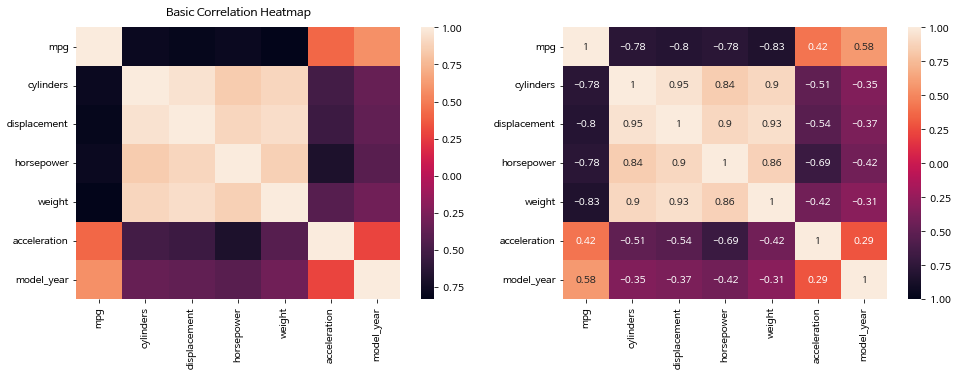

In [43]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))
# 기본 상관관계 히트맵
sns.heatmap(num_mpg.corr(), ax = ax[0])
ax[0].set_title('Basic Correlation Heatmap', pad = 12)

# 상관관계 수치 그래프 [Correlation Heatmap with Number]
sns.heatmap(num_mpg.corr(), vmin=-1, vmax = 1, annot=True, ax = ax[1])
ax[0].set_title('Basic Correlation Heatmap', pad = 12)

plt.show()

- https://jehyunlee.github.io/2020/08/27/Python-DS-28-mpl_spines_grids/

In [44]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

In [45]:
def plot_example(ax, zorder=0):
    ax.bar(tips_day["day"], tips_day["tip"], color="lightgray", zorder=zorder)
    ax.set_title("tip (mean)", fontsize=16, pad=12)

    # Values
    h_pad = 0.1
    for i in range(4):
        fontweight = "normal"
        color = "k"
        if i == 3:
            fontweight = "bold"
            color = "darkred"

        ax.text(i, tips_day["tip"].loc[i] + h_pad, f"{tips_day['tip'].loc[i]:0.2f}", 
                horizontalalignment='center', fontsize=12, fontweight=fontweight, color=color)

    # Sunday
    ax.patches[3].set_facecolor("darkred")
    ax.patches[3].set_edgecolor("black")

    # set_range
    ax.set_ylim(0, 4)
    return ax

def major_formatter(x, pos):
    return "{%.2f}" % x
formatter = FuncFormatter(major_formatter)

In [46]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

tips = sns.load_dataset("tips")
tips_day = tips.groupby("day").mean().reset_index()
print(tips_day)

    day  total_bill       tip      size
0  Thur   17.682742  2.771452  2.451613
1   Fri   17.151579  2.734737  2.105263
2   Sat   20.441379  2.993103  2.517241
3   Sun   21.410000  3.255132  2.842105


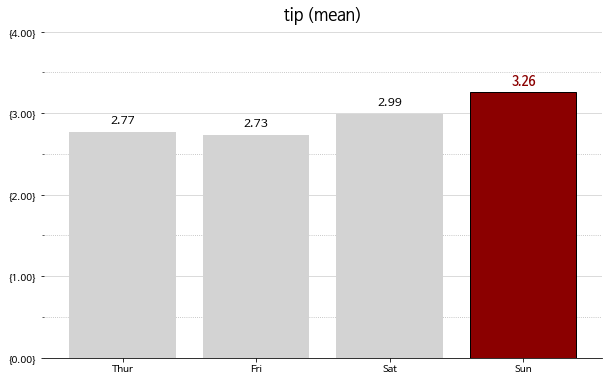

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = plot_example(ax, zorder=2)

# 옵션 1
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# 옵션 2
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

# 옵션 3
ax.grid(axis="y", which="major", color="lightgray")
ax.grid(axis="y", which="minor", ls=":")

## 강사님과 함께 코드

Sun 21.41
Text(0, 0, 'Thur')
Text(1, 0, 'Fri')
Text(2, 0, 'Sat')
Text(3, 0, 'Sun')


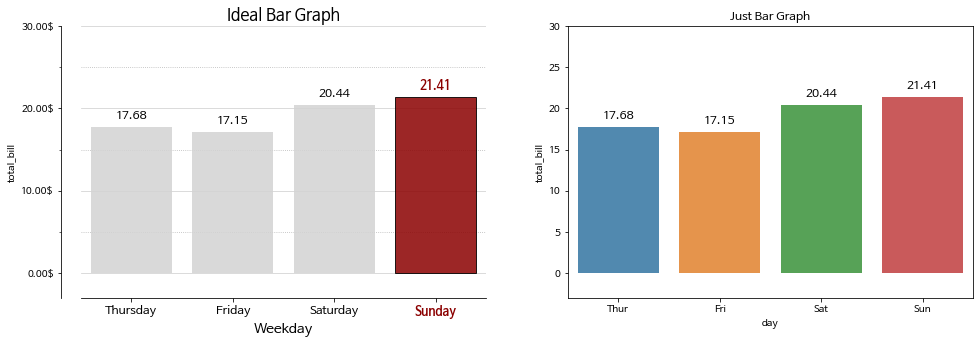

In [80]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

def major_formatter(x, pos):
  return"%.2F$" % x #21.10$

formatter = FuncFormatter(major_formatter)

tips = sns.load_dataset('tips')

# 데이터 가공
group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending = False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2)
print(h_day, h_mean)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 5))
ax0 = sns.barplot(x = 'day', y = 'total_bill', data = tips,
                  errorbar = None, color = 'lightgray',
                  alpha = 0.85, zorder = 2, ax = ax[0])
for p in ax0.patches:
  fontweight = 'normal'
  color = 'k'
  height = np.round(p.get_height(), 2)
  if h_mean == height:
    fontweight = 'bold'
    color = 'darkred'
    p.set_facecolor(color)
    p.set_edgecolor("black")
  ax0.text(p.get_x() + p.get_width()/2., height + 1, height,
  ha = 'center', size=12, fontweight = fontweight, color = color)

# y축 변환
ax0.set_ylim(-3, 30)

# y축 타이틀
ax0.set_title('Ideal Bar Graph', size = 16)

# 옵션 1
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.spines["left"].set_position(('outward', 20))


# 옵션 2
ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

# 옵션 3
ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

ax0.set_xlabel('Weekday', fontsize = 14)
for xtick in ax0.get_xticklabels():
  print(xtick)
  if xtick.get_text() == h_day:
    xtick.set_color('darkred')
    xtick.set_fontweight('demibold')
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size =12)

ax1 = sns.barplot(x = "day", y = 'total_bill', data = tips, 
                  errorbar=None, alpha=0.85, 
                  ax=ax[1])
for p in ax1.patches:
  height = np.round(p.get_height(), 2)
  ax1.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12)
ax1.set_ylim(-3, 30)
ax1.set_title("Just Bar Graph")

fig.show()

plt.show()